import libraries

In [41]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configure visualizations
sns.set(style="whitegrid")

In [43]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [44]:
print("Customers:\n", customers.head(), "\n")
print("Products:\n", products.head(), "\n")
print("Transactions:\n", transactions.head(), "\n")

Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067 

Check for Missing Values

In [45]:
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Convert Date Columns to Datetime Format

In [46]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

 EDA - Customers Analysis

In [75]:
def customers_analysis():
    print("\nCustomer Region Distribution:")
    region_counts = customers['Region'].value_counts()
    print(region_counts)
    
    # Set the custom color palette before the plot
    sns.set_palette('viridis')

    # Visualize regions
    plt.figure(figsize=(8, 6))
    sns.countplot(data=customers, x='Region', order=region_counts.index)
    plt.title('Customer Distribution by Region')
    plt.xticks(rotation=45)
    plt.show()

    # Signup trends
    customers['SignupYear'] = customers['SignupDate'].dt.year
    signup_trends = customers['SignupYear'].value_counts().sort_index()
    print("\nSignup Trends by Year:")
    print(signup_trends)

    # Visualize signup trends
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o', color='b')
    plt.title('Customer Signup Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Signups')
    plt.show()


EDA - Products Analysis

In [77]:
def products_analysis():
    print("\nProduct Categories Distribution:")
    category_counts = products['Category'].value_counts()
    print(category_counts)

    # Set the custom color palette globally
    sns.set_palette('viridis')

    # Visualize categories
    plt.figure(figsize=(8, 6))
    sns.barplot(x=category_counts.values, y=category_counts.index)
    plt.title('Product Distribution by Category')
    plt.show()

    # Price distribution
    print("\nPrice Summary:")
    print(products['Price'].describe())

    plt.figure(figsize=(8, 6))
    sns.histplot(products['Price'], bins=20, kde=True, color='green')
    plt.title('Price Distribution of Products')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()


EDA-Transactions Analysis

In [62]:
def transactions_analysis():
    print("\nTransactions Summary:")
    print(transactions.describe())

    # Sales trends over time
    transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
    sales_trends = transactions.groupby('YearMonth')['TotalValue'].sum()

    print("\nMonthly Sales Trends:")
    print(sales_trends)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=sales_trends.index.astype(str), y=sales_trends.values, marker='o')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales (USD)')
    plt.xticks(rotation=45)
    plt.show()

    # Top products
    top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
    if top_products.empty:
        print("No valid products found")
    else:
        print("\nTop 10 Products by Total Sales:")
        print(top_products)

        plt.figure(figsize=(8, 6))
        sns.barplot(x=top_products.values, y=top_products.index)  # Removed palette to avoid the warning
        plt.title('Top 10 Products by Total Sales')
        plt.xlabel('Total Sales (USD)')
        plt.ylabel('Product ID')
        plt.show()


Run EDA Functions


Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


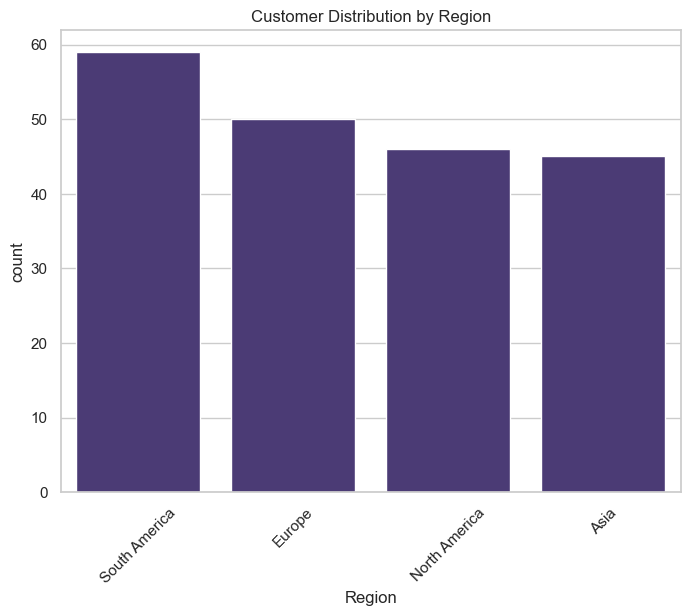


Signup Trends by Year:
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


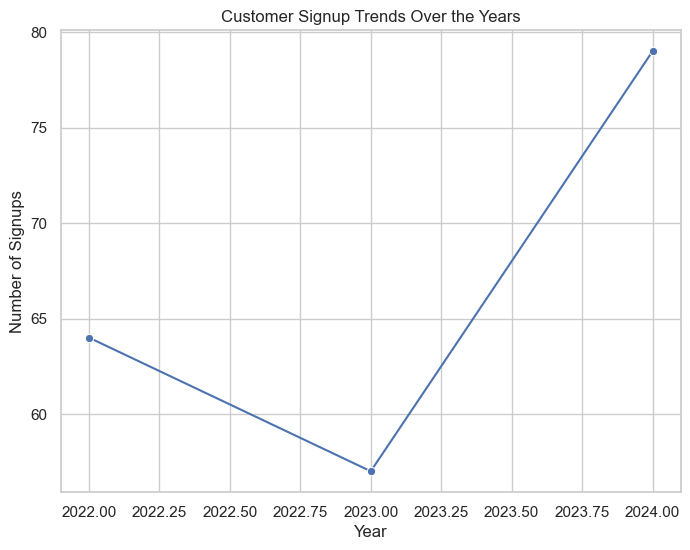


Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


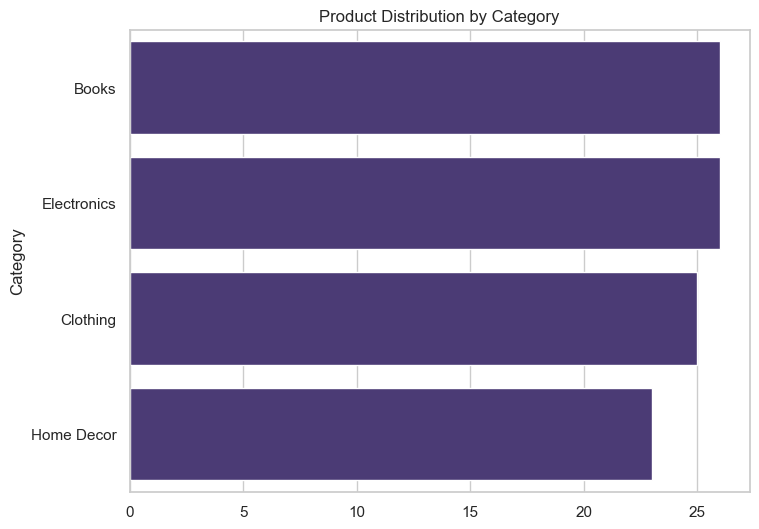


Price Summary:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


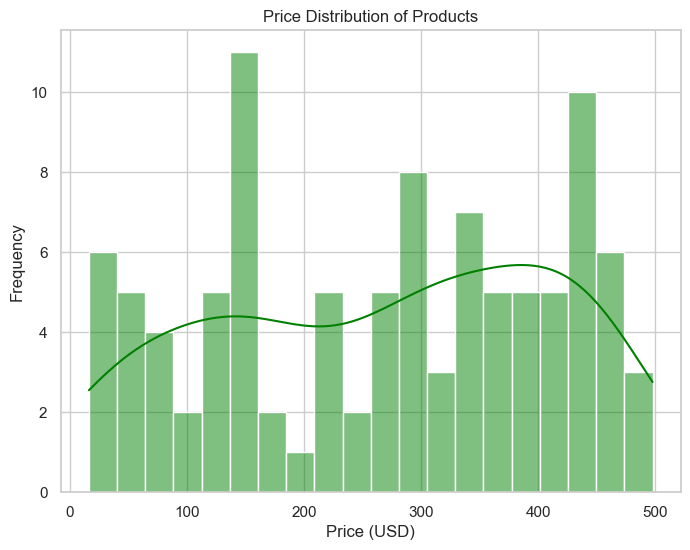


Transactions Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639

Monthly Sales Trends:
YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, 

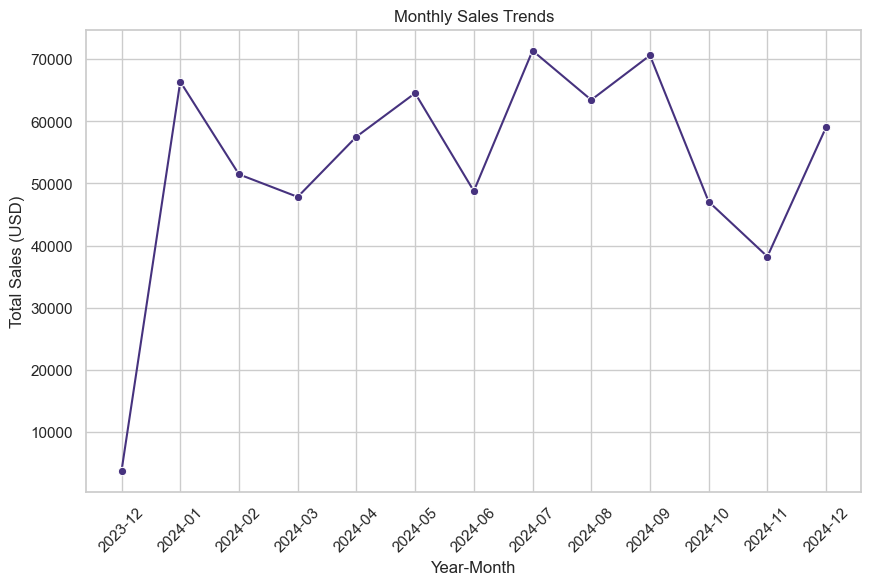


Top 10 Products by Total Sales:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


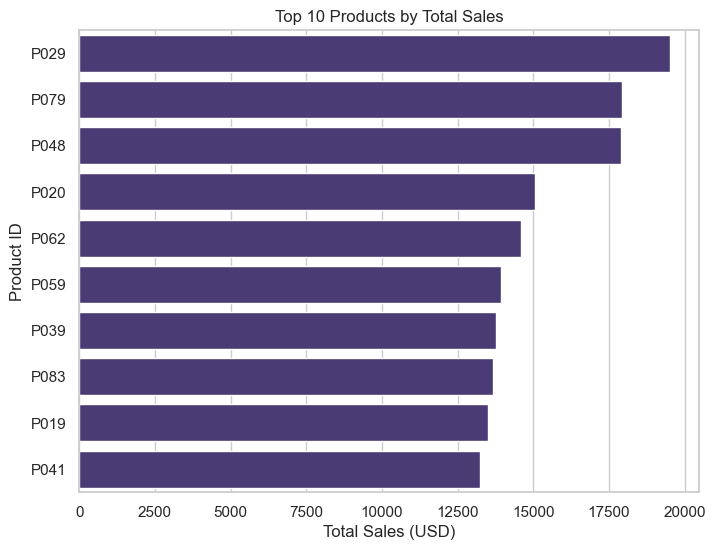

In [78]:
customers_analysis()
products_analysis()
transactions_analysis()